EDA Heavily inspired by this [article](https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import os

from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
'''
This section is to allow the user to select what plant they want to work with
Currently only has 2 option, but in the future we can 
add to the list of plants to filter

Idea was taken from:
https://stackoverflow.com/questions/23294658/asking-the-user-for-input-until-they-give-a-valid-response
'''
#set an empty string for the folder of plant images
folder = ""
while True:
  #condition to see if user inputed an accepted plant
  if folder not in ("Tomato","Potato"):
    #gets the users input
    folder = input('Enter either "Tomato" or "Potato ')
    #upper cases the title to make sure it matches if condition
    folder= folder.title()
  else:
    break
#shows the output
folder

Enter either "Tomato" or "Potato Tomato


'Tomato'

In [4]:
#got idea from https://stackoverflow.com/questions/56668739/how-to-unzip-a-folder-passing-a-variable
unzip_path = f'/content/drive/MyDrive/datasets/{folder}'
!unzip -q "$unzip_path"

In [5]:
plant = image_dataset_from_directory(
    folder,
    image_size=(256, 256),
    batch_size=32,
)

Found 4500 files belonging to 3 classes.


In [6]:
#Idea from lab 2.02 https://git.generalassemb.ly/derik/lab-2.02-excel/blob/master/starter-code.ipynb
path = f'/content/{folder}'
plant_dir = [x for x in os.listdir(path)]

In [7]:
folders= os.listdir(path)
folders

['Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Early_blight']

Tomato_healthy has 1591 files


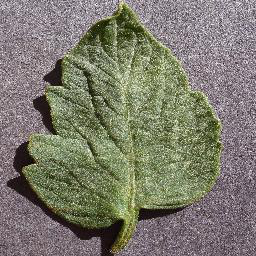

Tomato_Late_blight has 1909 files


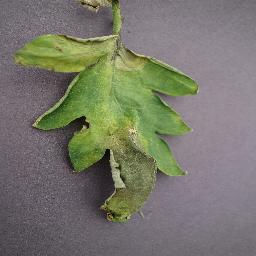

Tomato_Early_blight has 1000 files


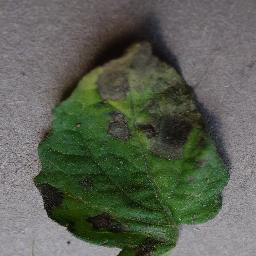

In [8]:
#loop through each sub folder (i)
for i in folders:
  #prints the number of images in each sub folder
  print(f"{i} has {len(os.listdir(f'{path}/{i}'))} files")
  #gets the name of the image
  image_name = os.listdir(f'{path}/{i}')[0]
  #loads the image using the pathway
  image = load_img(f'{path}/{i}/{image_name}')
  #shows the image
  image.show()

CHAT-GPT 4 code that we turned into a function

Prompt: "I have an image data set that I want to do EDA on. How can I average out the pixel values of all the images in a class. python keras"

In [9]:
def avg_images(sub_folder):
  path = f'/content/{folder}/'
  class_name = sub_folder
  batch_size = 32  # Modify this to suit your needs

  datagen = ImageDataGenerator(rescale=1./255)  # normalize pixel values to [0,1]
  generator = datagen.flow_from_directory(path,
                                          classes=[class_name],
                                          class_mode=None,
                                          color_mode='rgb',
                                          target_size=(256, 256),
                                          batch_size=batch_size)

  n_samples = generator.samples
  average_image = np.zeros((256, 256, 3))

  for i in range(n_samples // batch_size):  # Integer division to avoid partial batches
      images = next(generator)
      average_image += np.sum(images, axis=0)

  average_image /= n_samples
  return average_image

Found 1591 images belonging to 1 classes.


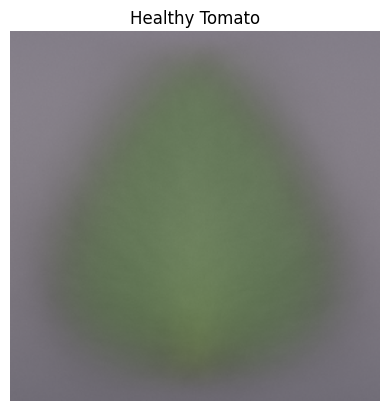

In [10]:
healthy_average_image = avg_images(f'{folder}_healthy')
plt.title(f'Healthy {folder}')
plt.axis('off')
plt.imshow(healthy_average_image)
plt.savefig(f'Healthy_{folder}.png')

Found 1000 images belonging to 1 classes.


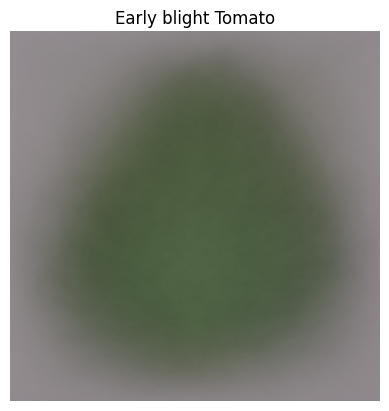

In [11]:
early_blight_average_image = avg_images(f'{folder}_Early_blight')
plt.title(f'Early blight {folder}')
plt.axis('off')
plt.imshow(early_blight_average_image)
plt.savefig(f'Early_blight_{folder}.png')

Found 1909 images belonging to 1 classes.


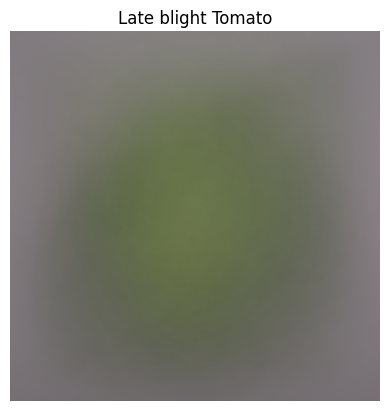

In [12]:
late_blight_average_image = avg_images(f'{folder}_Late_blight')
plt.title(f'Late blight {folder}')
plt.axis('off')
plt.imshow(late_blight_average_image)
plt.savefig(f'Late_blight_{folder}.png')

Although not immediately obvious there is already a difference that can be obveserved in the averaging of the pixel values of the three different classes. The healthy leaves show a bit more of a lighter green and shine. This could be indicative that healthier leaves reflect light better. The early blight leaves averaged out the darkest. This could be indicative that the loss of health lead to less reflectiveness in the leaves. The dark patches were also lowering the average value as well. The Late Blight, however, averaged out even lighter, but the it still doesn't have as much a reflectiveness to it, and the color value started to shift to yellow, presumably from all the green and brown color values from mixing.

In [13]:
contrast_healthy_early = healthy_average_image - early_blight_average_image
contrast_healthy_late = healthy_average_image - late_blight_average_image
contrast_early_late = early_blight_average_image - late_blight_average_image

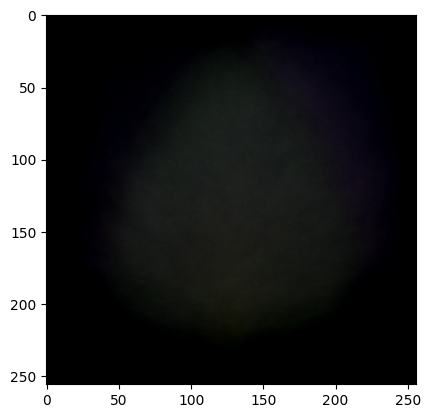

In [14]:
plt.imshow(contrast_healthy_early, cmap='PRGn')

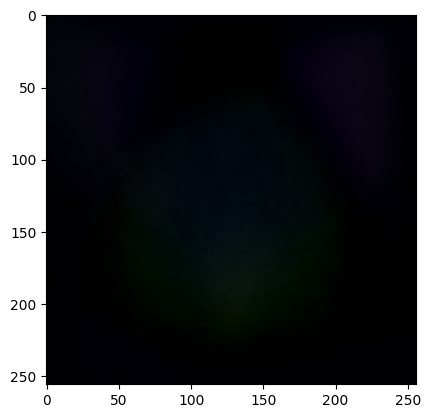

In [15]:
plt.imshow(contrast_healthy_late, cmap='PRGn')

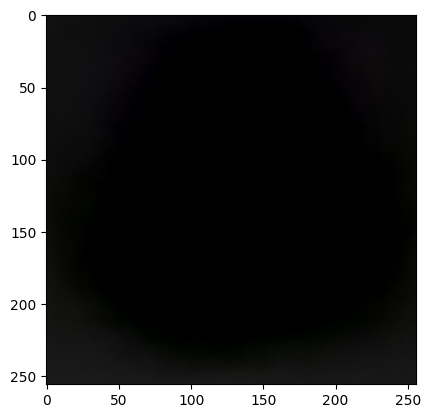

In [16]:
plt.imshow(contrast_early_late, cmap='PRGn')

In [17]:
def sd_images(sub_folder, average_image):
  path = f'/content/{folder}/'
  class_name = sub_folder
  batch_size = 32  # Modify this to suit your needs

  datagen = ImageDataGenerator(rescale=1./255)  # normalize pixel values to [0,1]
  generator = datagen.flow_from_directory(path,
                                          classes=[class_name],
                                          class_mode=None,
                                          color_mode='rgb',
                                          target_size=(256, 256),
                                          batch_size=batch_size)

  n_samples = generator.samples
  standard_deviation_image = np.zeros((256, 256, 3))

  for i in range(n_samples // batch_size):  # Integer division to avoid partial batches
      images = next(generator)
      standard_deviation_image += np.sum((images - average_image) ** 2, axis=0)

  standard_deviation_image /= n_samples - 1
  return np.sqrt(standard_deviation_image)

Found 1591 images belonging to 1 classes.


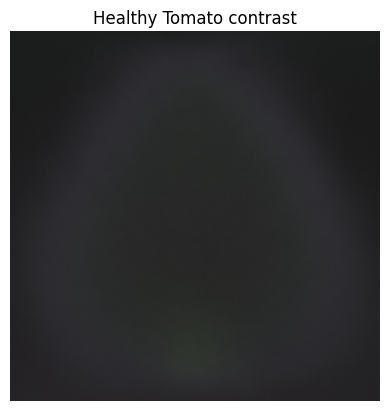

In [18]:
healthy_sd_image = sd_images(f'{folder}_healthy', healthy_average_image)
plt.title(f'Healthy {folder} contrast')
plt.axis('off')
plt.imshow(healthy_sd_image)
plt.savefig(f'Healthy_{folder}_contrast.png')

Found 1000 images belonging to 1 classes.


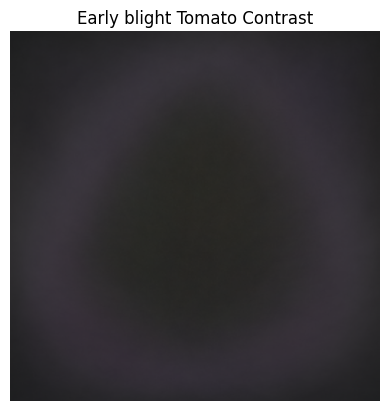

In [19]:
early_blight_sd_image = sd_images(f'{folder}_Early_blight', early_blight_average_image)
plt.title(f'Early blight {folder} Contrast')
plt.axis('off')
plt.imshow(early_blight_sd_image)
plt.savefig(f'Early_blight_{folder}_contrast.png')

Found 1909 images belonging to 1 classes.


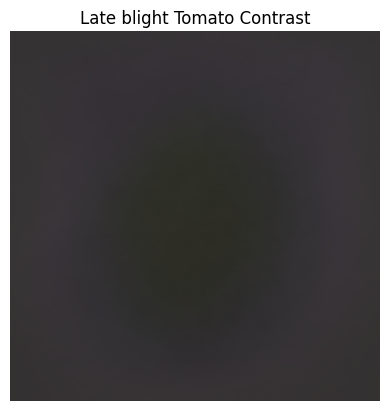

In [20]:
late_blight_sd_image = sd_images(f'{folder}_Late_blight', late_blight_average_image)
plt.title(f'Late blight {folder} Contrast')
plt.axis('off')
plt.imshow(late_blight_sd_image)
plt.savefig(f'Late_blight_{folder}_Contrast.png')

In [21]:
contrast_sd_healthy_early = healthy_sd_image - early_blight_sd_image
contrast_sd_healthy_late = healthy_sd_image - late_blight_sd_image
contrast_sd_early_late = early_blight_sd_image - late_blight_sd_image